# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Moaz Barakat

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete() 

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [62]:
#1
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#2 and #3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

tree = DecisionTreeRegressor(max_depth=5,random_state=0).fit(X_train, y_train)
# Important RF parameters to consider: random_state, max_depth, n_estimators max_features 
forest = RandomForestRegressor(max_depth=5,random_state=0, n_estimators=10).fit(X_train, y_train)
# Important GB paramerts to consider: random_state, max_depth, learning_rate, n_estimators
gradient = GradientBoostingRegressor(max_depth=5,random_state=0, learning_rate=0.05).fit(X_train, y_train)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

def print_accuracy_validation(name, model, X_train, y_train, cv_scoring, negate): #Prints and returns the training and validation scores 
    print("\nScore for", name)

    scores = cross_validate(model, X_train, y_train, cv=5, scoring=cv_scoring,  return_train_score=True)

    print('training accuracy (cross-validation) {:.3f}'.format(scores['train_score'].mean() * negate))
    print('validation accuracy (cross-validation) {:.3f}'.format(scores['test_score'].mean() * negate))
    return scores['train_score'].mean() * negate, scores['test_score'].mean() * negate #Note: return values used in step 5

ta_1, va_1 = print_accuracy_validation("DecisionTree", model=tree, X_train=X_train, y_train=y_train, cv_scoring='neg_mean_squared_error',negate=-1)
ta_2, va_2 = print_accuracy_validation("Forest", model=forest, X_train=X_train, y_train=y_train, cv_scoring='neg_mean_squared_error',negate=-1)
ta_3, va_3 = print_accuracy_validation("Gradient", model=gradient, X_train=X_train, y_train=y_train, cv_scoring='neg_mean_squared_error',negate=-1)

#Real tests, not cross validated
#val1_p = tree.score(X_test, y_test) 
#val2_p = forest.score(X_test, y_test)
#val3_p = gradient.score(X_test, y_test)




Score for DecisionTree
training accuracy (cross-validation) 49.863
validation accuracy (cross-validation) 79.490

Score for Forest
training accuracy (cross-validation) 33.355
validation accuracy (cross-validation) 53.410

Score for Gradient
training accuracy (cross-validation) 7.175
validation accuracy (cross-validation) 27.184


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [64]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 5
# Note: for any random state parameters, you can use random_state = 0
#5.2, HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

mse_results_list = [[ta_1, va_1],[ta_2,va_2],[ta_3,va_3]]
results = pd.DataFrame(mse_results_list,columns=["Training accuracy", "Validation accuracy"], index=['DT', 'RF', 'GB'])
print("Scoring: MSE")
results
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

Scoring: MSE


,Training accuracy,Validation accuracy
DT,49.862596,79.490160
RF,33.355207,53.409972
GB,7.175423,27.184409


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [65]:
# Note function created at top simplifies code for this step
tar_1, var_1 = print_accuracy_validation("DecisionTree", model=tree, X_train=X_train, y_train=y_train, cv_scoring='r2',negate=1)
tar_2, var_2 = print_accuracy_validation("Forest", model=forest, X_train=X_train, y_train=y_train, cv_scoring='r2',negate=1)
tar_3, var_3 = print_accuracy_validation("Gradient", model=gradient, X_train=X_train, y_train=y_train, cv_scoring='r2', negate=1)

r2_results_list = [[tar_1, var_1],[tar_2,var_2],[tar_3,var_3]]
results = pd.DataFrame(r2_results_list,columns=["Training accuracy", "Validation accuracy"], index=['DT', 'RF', 'GB'])
print("\nScoring: R2")
results


Score for DecisionTree
training accuracy (cross-validation) 0.821
validation accuracy (cross-validation) 0.711

Score for Forest
training accuracy (cross-validation) 0.880
validation accuracy (cross-validation) 0.808

Score for Gradient
training accuracy (cross-validation) 0.974
validation accuracy (cross-validation) 0.902

Scoring: R2


,Training accuracy,Validation accuracy
DT,0.821295,0.710786
RF,0.880495,0.807792
GB,0.974308,0.901926


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. From assignment 2 solution, the concrete dataset had a MSE ~`110.35/95.64` and a R2 ~`0.61/0.64` for training and validation accuracy respectively using the **linear** regression model. In contrast, using **non-linear** models all resulted in a better score as shown in the table(s) above (E.g `>0.64` R2).  Generally speaking: the higher the R2 the better (ideal value = 1) and the lower the MSE the better (ideal value = 0). We can see that the score for the non-linear model is much better than the linear model. 

Comparison of the models is outlined below:
  - DT: Performed better than linear (from assignment 2)
  - RF: Performed better than DT (evident from both MSE/R2 score)
  - GB: Performed better than RF (evident from both MSE/R2 score)

Additionally, the compressive strength is complex and nonlinear feature in nature, it makes sense that the non-linear model would do better than the linear model

2. Based on the result, the validation accuracy of GB yielded the highest result. I would personally choose the GB model over the DT and RF. One thing to note is that the GB might be overfitting since the training accuracy is very close to 1. The parameters of GB can be fine-tuned/pre-pruned to resolve this issue.

3. To increase the accuracy, we can fine tune the hyper parameters of the tree models and increase the complexity. Below are suggestions for each tree:
 - DT: Increase  max_depth, increase max_features
 - RF: Increase  max_depth, increase n_estimators
 - RF: Increase  max_depth, increase learning_rate

 More generally, we can use Grid Search to find the optimal hyper parameters
 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Where did you source your code?
 - Code is based on a combination of lectures examples and documentation from scikit learn
  - Lecture slides adopted from: <cite>Introduction to Machine Learning with Python, Müller and Guido, 1st ed, 2016 https://github.com/amueller/introduction_to_ml_with_python</cite>
  - Scikit learn general documentation available at: <cite> https://scikit-learn.org/stable/ </cite>
  - Concrete dataset: <cite> https://www.scikit-yb.org/en/latest/api/datasets/concrete.html </cite>
2. In what order did you complete the steps?
  - The order of the steps was done as per the assignment, steps 1-5 as it seemed logically
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
  - Similar to assignment 2, I explicitly avoided using any generative AI throughout this process so I can learn while doing the assignment
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
  - No major challenges, examples on D2L really helped me a lot. 

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [111]:
# TO DO: Import wine dataset
#import pandas as pd
col_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", 
             "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
             "OD280/OD315 of diluted wines", "Proline"]

wine_df = pd.read_csv("wine_ds/wine.data", names=col_names)

#Target is the class of wine
X = wine_df.drop(['Class'], axis=1)
y = wine_df['Class']

print("X Size: ", X.size, ", Shape: ", X.shape)
print("y Size: ", y.size, ", Shape: ", y.shape)
#print(X.dtypes)
#print(y.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X Size:  2314 , Shape:  (178, 13)
y Size:  178 , Shape:  (178,)


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [114]:
# TO DO: ADD YOUR CODE HERE
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [115]:
# TO DO: ADD YOUR CODE HERE
nullsX = X.isnull().sum().sort_values(ascending=False)
nullsy = y.isnull().sort_values().sum
print(nullsX) #Note: no nulls confirmed
print(nullsy) #Note: no nulls confirmed

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
113    False
114    False
115    False
116    False
       ...  
62     False
63     False
64     False
44     False
177    False
Name: Class, Length: 178, dtype: bool>


How many samples do we have of each type of wine?

In [126]:
# TO DO: ADD YOUR CODE HERE
class_samples = wine_df.groupby(['Class']).size()
class_samples


Class
1    59
2    71
3    48
dtype: int64

### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [133]:
#1
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#2

# SVC classifier
svm = SVC(random_state=0)

# Decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=3,random_state=0)

#3
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [134]:

#4
#IMPORTANT: I re-used the function I created from step 3 in q1, this will give the cross validate results
ta_sv_1, var_sv_1 = print_accuracy_validation("SVC", model=svm, X_train=X_train, y_train=y_train, cv_scoring='accuracy',negate=1)
ta_dt_1, var_dt_1 = print_accuracy_validation("Decision Tree", model=decision_tree, X_train=X_train, y_train=y_train, cv_scoring='accuracy',negate=1)


Score for SVC
training accuracy (cross-validation) 0.673
validation accuracy (cross-validation) 0.649

Score for Decision Tree
training accuracy (cross-validation) 0.993
validation accuracy (cross-validation) 0.922


### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [144]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 5
# Note: for any random state parameters, you can use random_state = 0
acc_results_list = [[X.shape, ta_sv_1, var_sv_1],[X.shape, ta_dt_1, var_dt_1]] 
results_q2 = pd.DataFrame(acc_results_list,columns=["Size","Training accuracy", "Validation accuracy"], index=['SVC', 'DT'])
print("Scoring: Accuracy")
print(results_q2)

#Real scores: not cross validated
#val1_p = svm.score(X_test, y_test)
#val2_p = decision_tree.score(X_test, y_test)



Scoring: Accuracy
          Size  Training accuracy  Validation accuracy
SVC  (178, 13)           0.672597             0.648522
DT   (178, 13)           0.992967             0.922414


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [159]:
# TO DO: Implement best model
y_pred_dt = decision_tree.predict(X_test)
y_pred_sv = svm.predict(X_test)

y_sco_dt = decision_tree.score(X_test, y_test)
y_sco_sv = svm.score(X_test, y_test)

print("Scores of test data:")
print(y_sco_dt)
print(y_sco_sv)

# The method that gave the highest accuracy is the decision Tree


Scores of test data:
0.9444444444444444
0.8055555555555556


(36,)


<AxesSubplot: >

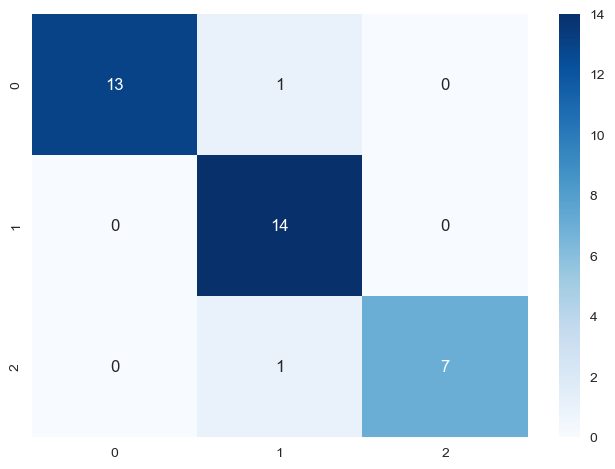

In [165]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(y_test.shape)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')

#ConfusionMatrixDisplay.from_predictions(y_test, 
 #                                       decision_tree.predict(X_test),                             
  #                                      cmap='rocket',
   #                                     colorbar=False);

In [153]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The cross validation for SVC was much lower compared to the decision tree E.g for validation accuracy SVC was `0.65` and decision tree was `0.92`. 
2. In the assignment, we were not required to scale the data for the SVC. As per lecture, the decision tree consider each feature seperatly. Therefore, the comparative magnitude of the features doesn’t matter. However, the SVC needs the data to be scaled. Therefore, we should scale the data for the SVC to work properly. Also we can graphsearch or tweak the hyper parameters
3. Using decision tree model, 2 samples were incorrectly classified (94% accuracy)
4. In this case, maximizing percision should be more important in the wine dataset. Depending on the situation the summary: Recall if false negative is more important, Percision if false positive is more important


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*



1. Where did you source your code?
 - Code is based on a combination of lectures examples and documentation from scikit learn
  - Lecture slides adopted from: <cite>Introduction to Machine Learning with Python, Müller and Guido, 1st ed, 2016 https://github.com/amueller/introduction_to_ml_with_python</cite>
  - Scikit learn general documentation available at: <cite> https://scikit-learn.org/stable/ </cite>
  - Wine dataset: <cite> https://archive.ics.uci.edu/dataset/109/wine </cite>
2. In what order did you complete the steps?
  - The order of the steps was done as per the assignment, steps 1-5 as it seemed logically
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
  - Similar to assignment 2, I explicitly avoided using any generative AI throughout this process so I can learn while doing the assignment
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
  - No major challenges, examples on D2L really helped me a lot. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


My observation include: 
 - Random forest does indeed create better results than decision tree as see in Q1 (E.g ~0.7 vs ~0.8 R2 score)
 - The training scores for some of the models was pretty close to 1, this suggests overfitting
 - SVC model needed the scaler or gridsearch to be more effective. Right now it does not yield great accuracy
 - GB proved to be a good model for the concrete dataset (E.g ~0.9 R2 score)
 - DT proved to be a good model for the wine dataset (E.g ~0.92 R2 score)

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

what you liked or disliked: 
- I liked that we went through multiple examples of non-linear models involving classification and regression 

found interesting, confusing, challangeing, motivating:
- It was intersting how the non linear model created pretty good results in comparison to the linear model. Addtionally, the example datasets were intersting and motivating

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Score for Linear SVC


c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


training accuracy (cross-validation) 0.926
validation accuracy (cross-validation) 0.888
[1 1 3 1 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 1 2 1 3 3 3 2 1 2 1 1 2 3 1 1 1]
0.9444444444444444
(36,)


<AxesSubplot: >

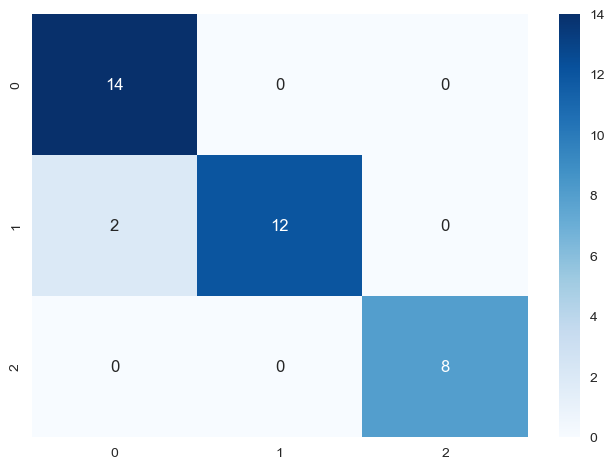

In [167]:
# TO DO: ADD YOUR CODE HERE
# Decision tree classifier
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=5000).fit(X_train, y_train)

ta_lsv_1, var_lsv_1 = print_accuracy_validation("Linear SVC", model=linear_svm, X_train=X_train, y_train=y_train, cv_scoring='accuracy',negate=1)

#Test data set, no cross
y_pred_lsv = linear_svm.predict(X_test)
y_sco_lsv = linear_svm.score(X_test, y_test)

print(y_pred_lsv)
print(y_sco_lsv)

cm_lsv = confusion_matrix(y_test, y_pred_lsv)
print(y_test.shape)
sns.heatmap(cm_lsv, annot=True, fmt='d', cmap='Blues')

*ANSWER HERE*

Based on the accuracy shown above, the confusion matrix, and the hyper parameter used Linear SVC is a good model to use.